# <span style="color:blue; font-size:16;">Example saspy notebook showing the python interface to SAS</span>

## Import the saspy module to get access to SAS 

In [1]:
import saspy

### to see where saspy is installed (where you're running from) just submit saspy after importing it

In [2]:
saspy

<module 'saspy' from '/opt/tom/github/saspy/saspy/__init__.py'>

### to see which config file saspy found and will use, by default, submit saspy.SAScfg

In [3]:
saspy.SAScfg

'/opt/tom/github/saspy/saspy/sascfg_personal.py'

### to see all config files found (in order) through the seach path, submit saspy.list_configs()

In [4]:
saspy.list_configs()

['/opt/tom/github/saspy/saspy/sascfg_personal.py',
 '/r/sanyo.unx.sas.com/vol/vol810/u81/sastpw/.config/saspy/sascfg_personal.py']

### Instantiate a SASsession object. This creates the SAS session that will be used for this notebook

In [5]:
sas = saspy.SASsession(results='HTML')

Please enter the name of the SAS Config you wish to run. Available Configs are: ['default', 'SASgrid', 'http', 'httptest', 'ssh', 'sshtun', 'sshrtun', 'httpfred', 'grid', 'tdi', 'tdi_cn', 'tdi_cn8', 'tdilat', 'oda', 'iomj', 'sdssas_cn', 'iomc', 'iomjwin', 'winiomj', 'winiomjwin', 'winlocal', 'gridiom', 'wingridiom', 'zos', 'zos2', 'winzos', 'winzos2', 'sshtest', 'sshloc', 'sdssas', 'saskr', 'vb010', 'vb015', 'pune', 'notpune', 'iomkr', 'httpviya', 'kevin', 'issue176', 'httpjason', 'itviya', 'carrie1', 'console', 'iomcom', 'iomcom_loc', 'iom4', 'm5bug', 'spre34', 'sshprob', 'vbviya', 'vbviyaxx', 'vbviyapp', 'alex', 'dotat', 'dotav', 'dotap', 'oda', 'mahesh']  sdssas


SAS Connection established. Subprocess id is 6534

No encoding value provided. Will try to determine the correct encoding.
Setting encoding to latin_1 based upon the SAS session encoding value of latin1.



## Submit the SASsession object to get info about your session

In [6]:
sas

Access Method         = STDIO
SAS Config name       = sdssas
SAS Config file       = /opt/tom/github/saspy/saspy/sascfg_personal.py
WORK Path             = /sastmp/SAS_workD5E4000019A2_tom64-5/
SAS Version           = 9.04.01M7D08052020
SASPy Version         = 3.3.7
Teach me SAS          = False
Batch                 = False
Results               = HTML
SAS Session Encoding  = latin1
Python Encoding value = latin_1
SAS process Pid value = 6562


### to see which sas config file (sascfg_personal.py) was used for this connection, submit this (you could use cfgfile= on different connections and then they could be different per conenction)

In [13]:
sas.sascfg.SAScfg

<module 'sascfg_personal' from '/opt/tom/github/saspy/saspy/sascfg_personal.py'>

### Delete the '#' sign bellow (comment), and put the cursor after the dot (.) and hit Tab. It will show you the methods available from the SASsession object

In [8]:
#sas.

### Create a SASdata object to use to access the cars data set in the sashelp library. 

In [9]:
cars = sas.sasdata('cars', libref='sashelp')

### Again, remove the comment character, #, and after the dot, hit Tab to see the methods available on the SASdata object

In [10]:
#cars.


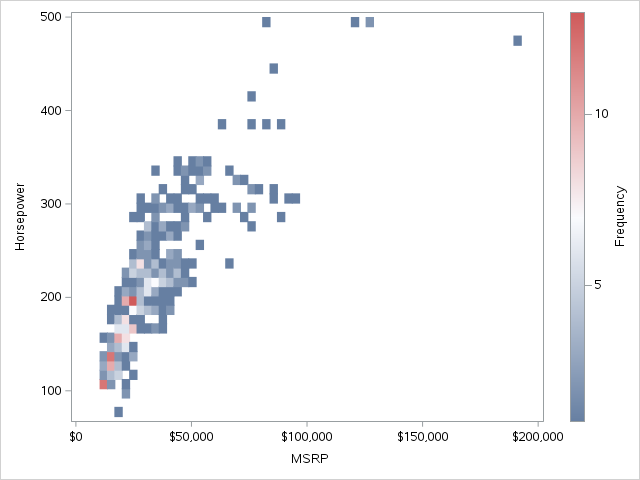

In [11]:
cars.heatmap('msrp','horsepower')

In [12]:
#cars.describe()
#cars.head()
cars.tail()

Obs,Make,Model,Type,Origin,DriveTrain,MSRP,Invoice,EngineSize,Cylinders,Horsepower,MPG_City,MPG_Highway,Weight,Wheelbase,Length
424,Volvo,C70 LPT convertible 2dr,Sedan,Europe,Front,"$40,565","$38,203",2.4,5,197,21,28,3450,105,186
425,Volvo,C70 HPT convertible 2dr,Sedan,Europe,Front,"$42,565","$40,083",2.3,5,242,20,26,3450,105,186
426,Volvo,S80 T6 4dr,Sedan,Europe,Front,"$45,210","$42,573",2.9,6,268,19,26,3653,110,190
427,Volvo,V40,Wagon,Europe,Front,"$26,135","$24,641",1.9,4,170,22,29,2822,101,180
428,Volvo,XC70,Wagon,Europe,All,"$35,145","$33,112",2.5,5,208,20,27,3823,109,186



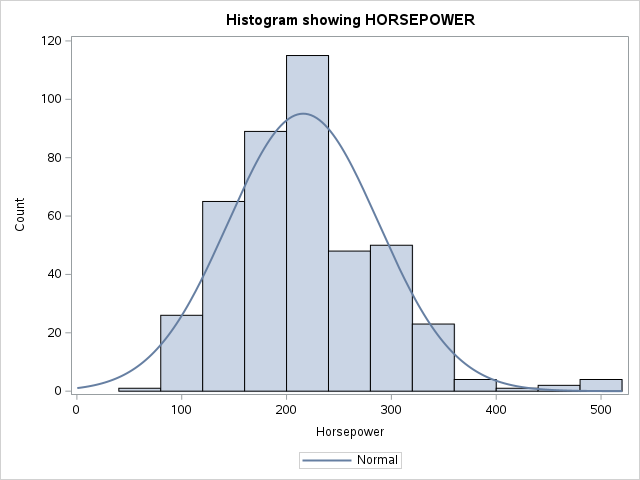


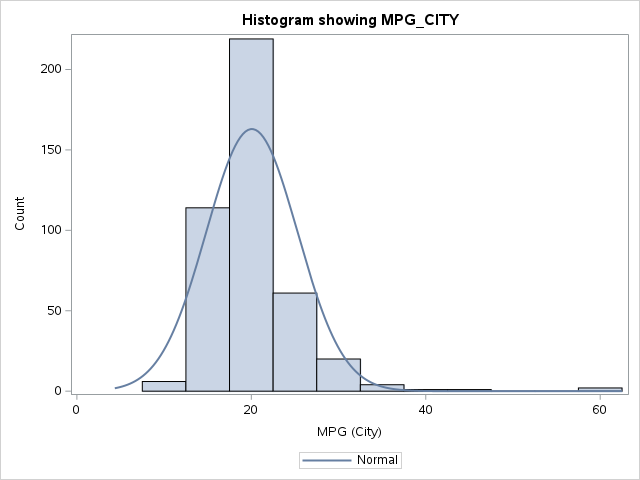


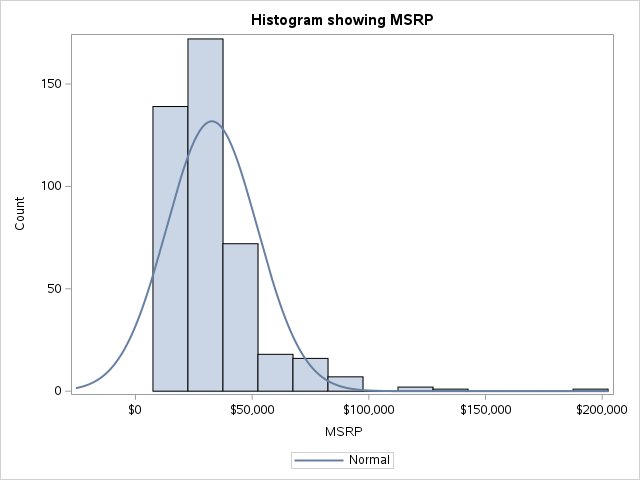

In [14]:
for col in ['horsepower','MPG_City', 'MSRP']:
    cars.hist(col, title='Histogram showing '+col.upper())

#### Try out any other methods too. To see the method signature (parameters and return type) just type the method with a ? at the end and submit;<br><br>**<span style="color:blue; font-size:16;">cars.hist?</span>**<br><br>This will pop up a window at the bottome and show information about the method.

In [15]:
cars.hist?

Signature: cars.hist(var:str, title:str='', label:str='') -> object
Docstring:
This method requires a numeric column (use the contents method to see column types) and generates a histogram.

:param var: the NUMERIC variable (column) you want to plot
:param title: an optional Title for the chart
:param label: LegendLABEL= value for sgplot
:return:
File:      /opt/tom/github/saspy/saspy/sasdata.py
Type:      method


## you can get a list of the assigned libraries in your session

In [16]:
for libref in sas.assigned_librefs():
    print(libref)

SASHELP
MAPS
MAPSGFK
SASUSER
WORK


## What's in SASUSER?

In [17]:
sas.datasets('sasuser')

### The SASsession object has a **submit** method to submit any SAS code you want.<br>It returns a dictionary with the LOG and the LST.<br>You can print the log and sas.HTML the results from the Listing. <br> You can also prompt for macro variable substitution at runtime!

In [19]:
ll = sas.submit('data &dsname; user="&user"; hidden="&pw"; run; proc print data=&dsname;run;', prompt={'user': False, 'pw': True, 'dsname': False})

Please enter value for macro variable pw  ·······················
Please enter value for macro variable user  tom
Please enter value for macro variable dsname  mydata


### use the sas.HTML method to render the LST which was returned as an HTML document

In [22]:
sas.HTML(ll['LST'])

Obs,user,hidden
1,tom,this is not my password


## see, there's no way to see the hidden promted values (pw in the above case)

In [23]:
print(ll['LOG'])


153  ods listing close;ods html5 (id=saspy_internal) file=stdout options(bitmap_mode='inline') device=svg style=HTMLBlue; ods
153! graphics on / outputfmt=png;
NOTE: Writing HTML5(SASPY_INTERNAL) Body file: STDOUT
154  
155  options nosource nonotes;
158  %let user=tom;
159  %let dsname=mydata;
160  data &dsname; user="&user"; hidden="&pw"; run; proc print data=&dsname;run;
NOTE: The data set WORK.MYDATA has 1 observations and 2 variables.
NOTE: DATA statement used (Total process time):
      real time           0.04 seconds
      cpu time            0.01 seconds
      
NOTE: There were 1 observations read from the data set WORK.MYDATA.
NOTE: PROCEDURE PRINT used (Total process time):
      real time           0.06 seconds
      cpu time            0.06 seconds
      
161  options nosource nonotes;
164  
165  ods html5 (id=saspy_internal) close;ods listing;



#### You can always see the entire session log by using the saslog() method of the SASsession object.

In [24]:
#print(sas.saslog())

### Use the submitLOG() method to have the LOG from the submitted code rendered for you

In [25]:
sas.submitLOG('libname work list;')


167  ods listing close;ods html5 (id=saspy_internal) file=stdout options(bitmap_mode='inline') device=svg style=HTMLBlue; ods
167! graphics on / outputfmt=png;
NOTE: Writing HTML5(SASPY_INTERNAL) Body file: STDOUT
168  
169  libname work list;
NOTE: Libref=   WORK 
      Scope=    Kernel  
      Engine=   V9
      Access=   TEMP
      Physical Name= /sastmp/SAS_workD5E4000019A2_tom64-5
      Filename= /sastmp/SAS_workD5E4000019A2_tom64-5
      Inode Number= 2929611036
      Access Permission= rwxr-xr-x
      Owner Name= sastpw
      File Size=              4KB
      File Size (bytes)= 4096
170  
171  ods html5 (id=saspy_internal) close;ods listing;



### Use the submitLST() method to have the LST rendered for you automatically. You can also add an option to get LST, unless there isn't any, then the LOG, or both LST and LOG, in either order.

In [31]:
sas.submitLST('data a;x=1;run; proc print data=a;run;')

Obs,x
1,1


In [32]:
sas.submitLST('data a;x=1;run; proc print data=a;run;', method='listorlog')

Obs,x
1,1


In [33]:
sas.submitLST('data a;x=1;run; proc print data=NoA;run;', method='listorlog')

In [34]:
sas.submitLST('data a;x=1;run; proc print data=a;run;', method='listandlog')

Obs,x
1,1


In [35]:
sas.submitLST('data a;x=1;run; proc print data=a;run;', method='logandlist')

Obs,x
1,1


## Want to read and write CSV files?

In [36]:
cars.to_csv('/tmp/cars.csv')


240  
241  filename x "/tmp/cars.csv";
242  options nosource;
NOTE: The file X is:
      Filename=/tmp/cars.csv,
      Owner Name=sastpw,Group Name=r&d,
      Access Permission=-rw-r--r--,
      Last Modified=12Aug2020:11:14:50

NOTE: 429 records were written to the file X.
      The minimum record length was 68.
      The maximum record length was 123.
NOTE: There were 428 observations read from the data set SASHELP.CARS.
NOTE: DATA statement used (Total process time):
      real time           0.07 seconds
      cpu time            0.02 seconds
      
428 records created in X from SASHELP.cars.
  
  
NOTE: "X" file was successfully created.
NOTE: PROCEDURE EXPORT used (Total process time):
      real time           1.28 seconds
      cpu time            0.45 seconds
      
330  
331  


In [37]:
carscsv = sas.read_csv('/tmp/cars.csv', 'cars_cvs')

In [38]:
carscsv.tail(7)

Obs,Make,Model,Type,Origin,DriveTrain,MSRP,Invoice,EngineSize,Cylinders,Horsepower,MPG_City,MPG_Highway,Weight,Wheelbase,Length
422,Volvo,S80 2.9 4dr,Sedan,Europe,Front,"$37,730","$35,542",2.9,6,208,20,28,3576,110,190
423,Volvo,S80 2.5T 4dr,Sedan,Europe,All,"$37,885","$35,688",2.5,5,194,20,27,3691,110,190
424,Volvo,C70 LPT convertible 2dr,Sedan,Europe,Front,"$40,565","$38,203",2.4,5,197,21,28,3450,105,186
425,Volvo,C70 HPT convertible 2dr,Sedan,Europe,Front,"$42,565","$40,083",2.3,5,242,20,26,3450,105,186
426,Volvo,S80 T6 4dr,Sedan,Europe,Front,"$45,210","$42,573",2.9,6,268,19,26,3653,110,190
427,Volvo,V40,Wagon,Europe,Front,"$26,135","$24,641",1.9,4,170,22,29,2822,101,180
428,Volvo,XC70,Wagon,Europe,All,"$35,145","$33,112",2.5,5,208,20,27,3823,109,186


In [39]:
 carscsv.describe()

Variable,N,N Miss,Median,Mean,Std Dev,Minimum,25th Pctl,50th Pctl,75th Pctl,Maximum
EngineSize,428,0,3.000000,3.196729,1.108595,1.300000,2.350000,3.000000,3.900000,8.300000
Cylinders,426,2,6.000000,5.807512,1.558443,3.000000,4.000000,6.000000,6.000000,12.000000
Horsepower,428,0,210.000000,215.885514,71.836032,73.000000,165.000000,210.000000,255.000000,500.000000
MPG_City,428,0,19.000000,20.060748,5.238218,10.000000,17.000000,19.000000,21.500000,60.000000
MPG_Highway,428,0,26.000000,26.843458,5.741201,12.000000,24.000000,26.000000,29.000000,66.000000
Weight,428,0,3474.500000,3577.953271,758.983215,1850.000000,3103.000000,3474.500000,3978.500000,7190.000000
Wheelbase,428,0,107.000000,108.154206,8.311813,89.000000,103.000000,107.000000,112.000000,144.000000
Length,428,0,187.000000,186.362150,14.357991,143.000000,178.000000,187.000000,194.000000,238.000000


## We can transfer data between SAS Data Sets and Pandas Data Frames 

In [40]:
import pandas

In [41]:
car_df = cars.to_df()

In [42]:
car_df.head()

,Make,Model,Type,Origin,DriveTrain,MSRP,Invoice,EngineSize,Cylinders,Horsepower,MPG_City,MPG_Highway,Weight,Wheelbase,Length
0,Acura,MDX,SUV,Asia,All,36945,33337,3.5,6.0,265,17,23,4451,106,189
1,Acura,RSX Type S 2dr,Sedan,Asia,Front,23820,21761,2.0,4.0,200,24,31,2778,101,172
2,Acura,TSX 4dr,Sedan,Asia,Front,26990,24647,2.4,4.0,200,22,29,3230,105,183
3,Acura,TL 4dr,Sedan,Asia,Front,33195,30299,3.2,6.0,270,20,28,3575,108,186
4,Acura,3.5 RL 4dr,Sedan,Asia,Front,43755,39014,3.5,6.0,225,18,24,3880,115,197


In [43]:
cars.head()

Obs,Make,Model,Type,Origin,DriveTrain,MSRP,Invoice,EngineSize,Cylinders,Horsepower,MPG_City,MPG_Highway,Weight,Wheelbase,Length
1,Acura,MDX,SUV,Asia,All,"$36,945","$33,337",3.5,6,265,17,23,4451,106,189
2,Acura,RSX Type S 2dr,Sedan,Asia,Front,"$23,820","$21,761",2.0,4,200,24,31,2778,101,172
3,Acura,TSX 4dr,Sedan,Asia,Front,"$26,990","$24,647",2.4,4,200,22,29,3230,105,183
4,Acura,TL 4dr,Sedan,Asia,Front,"$33,195","$30,299",3.2,6,270,20,28,3575,108,186
5,Acura,3.5 RL 4dr,Sedan,Asia,Front,"$43,755","$39,014",3.5,6,225,18,24,3880,115,197


In [44]:
car_df.dtypes

Make            object
Model           object
Type            object
Origin          object
DriveTrain      object
MSRP             int64
Invoice          int64
EngineSize     float64
Cylinders      float64
Horsepower       int64
MPG_City         int64
MPG_Highway      int64
Weight           int64
Wheelbase        int64
Length           int64
dtype: object

In [45]:
cars.columnInfo()

 Data Frames **describe** method matches up with our Proc Means. SASdata object has the **describe** method (and **means** as an alias method)

In [46]:
car_df.describe()

,MSRP,Invoice,EngineSize,Cylinders,Horsepower,MPG_City,MPG_Highway,Weight,Wheelbase,Length
count,428.000000,428.000000,428.000000,426.000000,428.000000,428.000000,428.000000,428.000000,428.000000,428.000000
mean,32774.855140,30014.700935,3.196729,5.807512,215.885514,20.060748,26.843458,3577.953271,108.154206,186.362150
std,19431.716674,17642.117750,1.108595,1.558443,71.836032,5.238218,5.741201,758.983215,8.311813,14.357991
min,10280.000000,9875.000000,1.300000,3.000000,73.000000,10.000000,12.000000,1850.000000,89.000000,143.000000
25%,20334.250000,18866.000000,2.375000,4.000000,165.000000,17.000000,24.000000,3104.000000,103.000000,178.000000
50%,27635.000000,25294.500000,3.000000,6.000000,210.000000,19.000000,26.000000,3474.500000,107.000000,187.000000
75%,39205.000000,35710.250000,3.900000,6.000000,255.000000,21.250000,29.000000,3977.750000,112.000000,194.000000
max,192465.000000,173560.000000,8.300000,12.000000,500.000000,60.000000,66.000000,7190.000000,144.000000,238.000000


In [47]:
cars.means()

Variable,Label,N,N Miss,Median,Mean,Std Dev,Minimum,25th Pctl,50th Pctl,75th Pctl,Maximum
MSRP,,428,0,27635,32775,19432,10280,20330,27635,39215,192465
Invoice,,428,0,25295,30015,17642,9875.000000,18851,25295,35733,173560
EngineSize,Engine Size (L),428,0,3.000000,3.196729,1.108595,1.300000,2.350000,3.000000,3.900000,8.300000
Cylinders,,426,2,6.000000,5.807512,1.558443,3.000000,4.000000,6.000000,6.000000,12.000000
Horsepower,,428,0,210.000000,215.885514,71.836032,73.000000,165.000000,210.000000,255.000000,500.000000
MPG_City,MPG (City),428,0,19.000000,20.060748,5.238218,10.000000,17.000000,19.000000,21.500000,60.000000
MPG_Highway,MPG (Highway),428,0,26.000000,26.843458,5.741201,12.000000,24.000000,26.000000,29.000000,66.000000
Weight,Weight (LBS),428,0,3474.500000,3577.953271,758.983215,1850.000000,3103.000000,3474.500000,3978.500000,7190.000000
Wheelbase,Wheelbase (IN),428,0,107.000000,108.154206,8.311813,89.000000,103.000000,107.000000,112.000000,144.000000
Length,Length (IN),428,0,187.000000,186.362150,14.357991,143.000000,178.000000,187.000000,194.000000,238.000000


## Now round trip the Data Frame back to a SAS Data Set

In [48]:
cars_full_circle = sas.df2sd(car_df, 'cfc')

In [49]:
cars_full_circle.describe()

Variable,N,N Miss,Median,Mean,Std Dev,Minimum,25th Pctl,50th Pctl,75th Pctl,Maximum
MSRP,428,0,27635,32775,19432,10280,20330,27635,39215,192465
Invoice,428,0,25295,30015,17642,9875.000000,18851,25295,35733,173560
EngineSize,428,0,3.000000,3.196729,1.108595,1.300000,2.350000,3.000000,3.900000,8.300000
Cylinders,426,2,6.000000,5.807512,1.558443,3.000000,4.000000,6.000000,6.000000,12.000000
Horsepower,428,0,210.000000,215.885514,71.836032,73.000000,165.000000,210.000000,255.000000,500.000000
MPG_City,428,0,19.000000,20.060748,5.238218,10.000000,17.000000,19.000000,21.500000,60.000000
MPG_Highway,428,0,26.000000,26.843458,5.741201,12.000000,24.000000,26.000000,29.000000,66.000000
Weight,428,0,3474.500000,3577.953271,758.983215,1850.000000,3103.000000,3474.500000,3978.500000,7190.000000
Wheelbase,428,0,107.000000,108.154206,8.311813,89.000000,103.000000,107.000000,112.000000,144.000000
Length,428,0,187.000000,186.362150,14.357991,143.000000,178.000000,187.000000,194.000000,238.000000


# Now let's look at the SASstat object!

In [50]:
stat = sas.sasstat()

In [51]:
#stat.                 # use the 'dot Tab ' to see the methods available

### Let's run a regression which will return us a SASresults object that we can use to see any/all of the results

In [52]:
stat_results = stat.reg(model='horsepower = Cylinders EngineSize',data=cars)

In [53]:
dir(stat_results)

['ANOVA',
 'COOKSDPLOT',
 'DFBETASPANEL',
 'DFFITSPLOT',
 'DIAGNOSTICSPANEL',
 'FITSTATISTICS',
 'LOG',
 'NOBS',
 'OBSERVEDBYPREDICTED',
 'PARAMETERESTIMATES',
 'QQPLOT',
 'RESIDUALBOXPLOT',
 'RESIDUALBYPREDICTED',
 'RESIDUALHISTOGRAM',
 'RESIDUALPLOT',
 'RFPLOT',
 'RSTUDENTBYLEVERAGE',
 'RSTUDENTBYPREDICTED']

### Pick any one you want ...


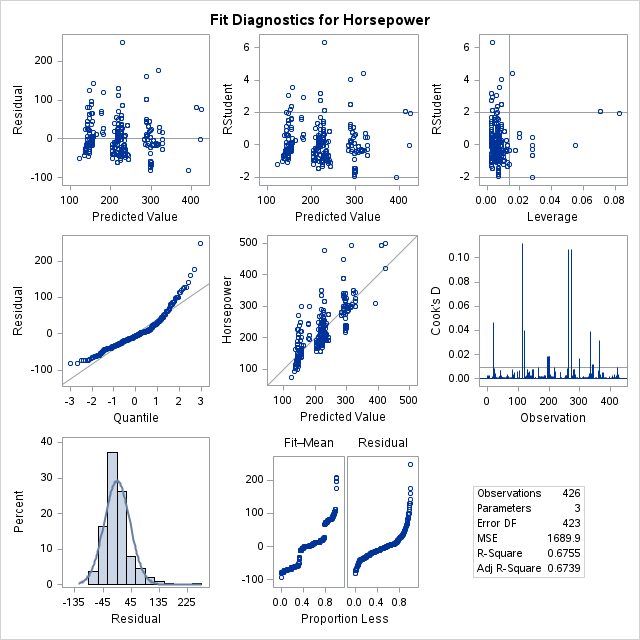

In [54]:
stat_results.DIAGNOSTICSPANEL

### Or display them ALL  (Click in the pannel to the Left of the results below to expand/shrink the result pane)


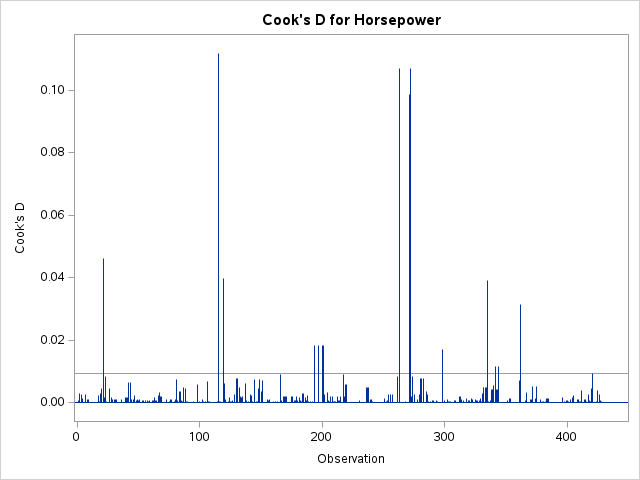


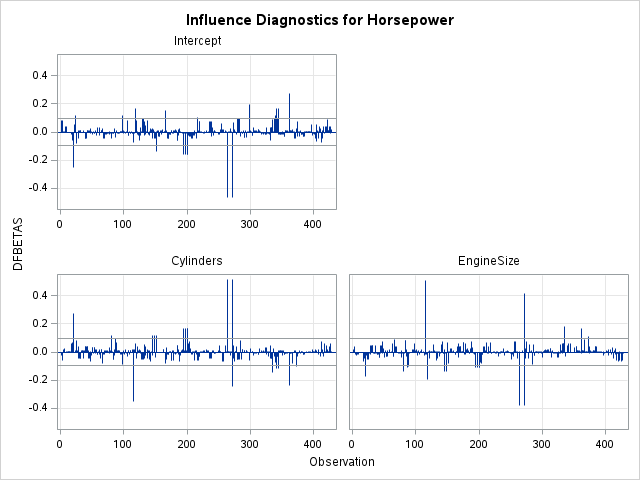


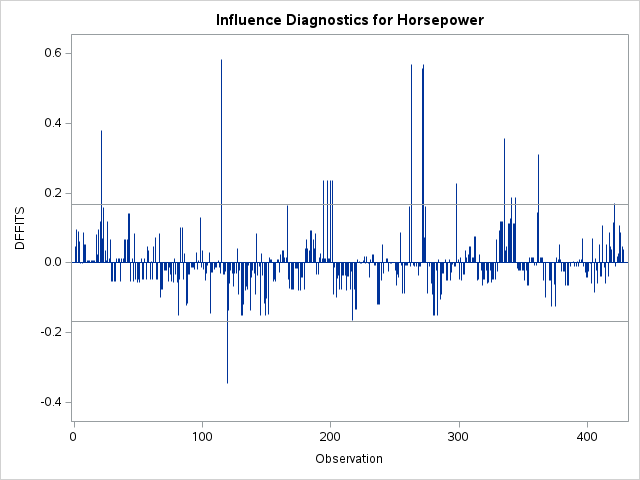


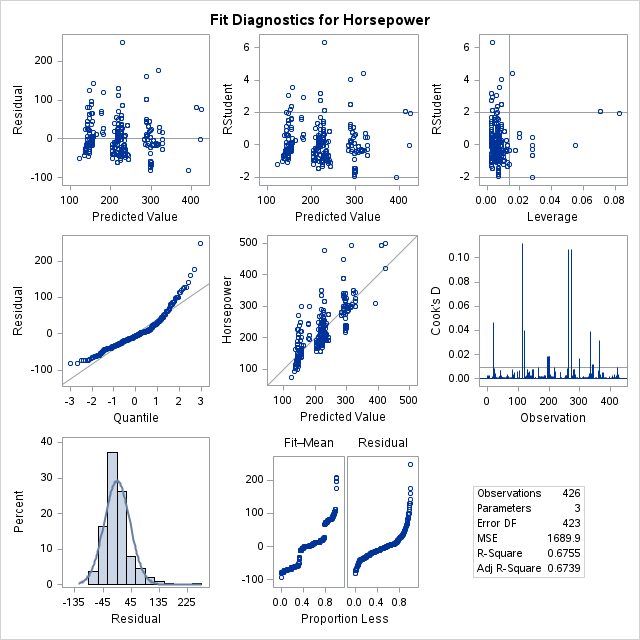

Root MSE,41.10897,R-Square,0.6755
Dependent Mean,215.87793,Adj R-Sq,0.6739
Coeff Var,19.04269,,


Number of Observations Read,428
Number of Observations Used,426
Number of Observations with Missing Values,2



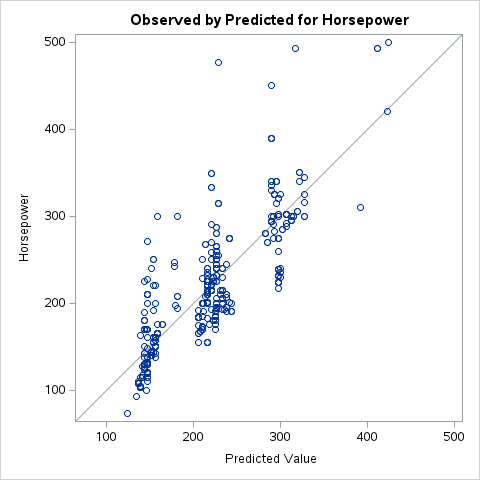


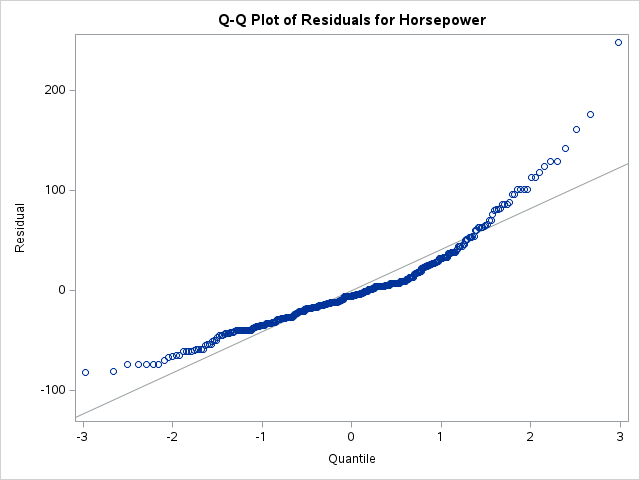


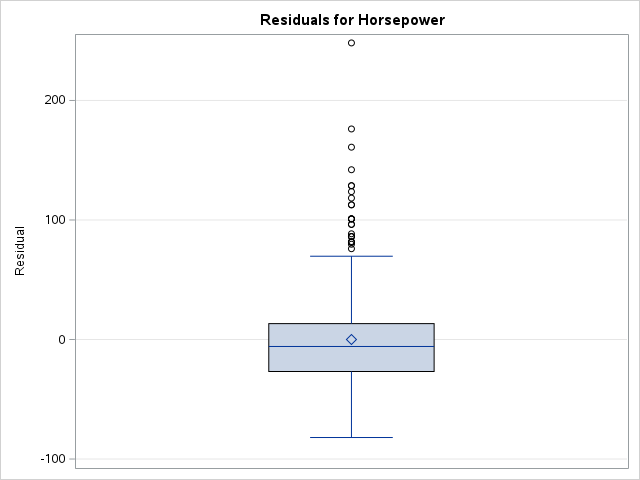


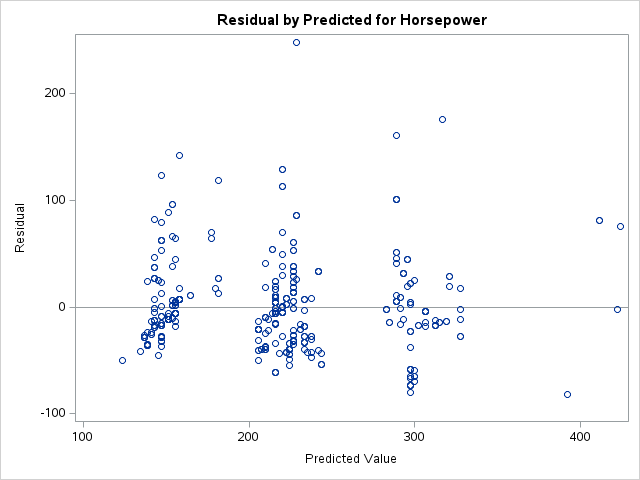


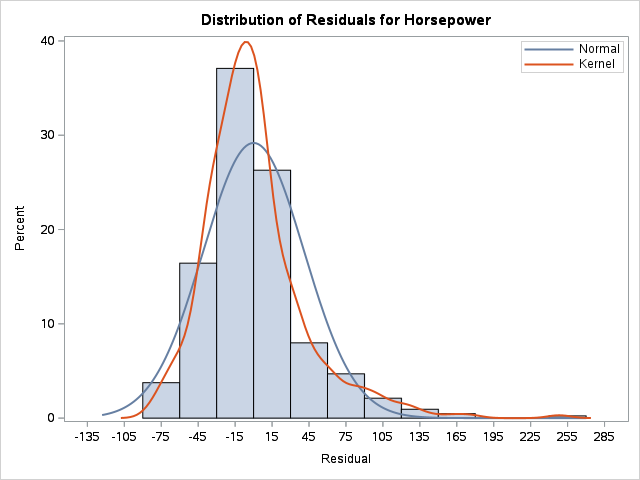


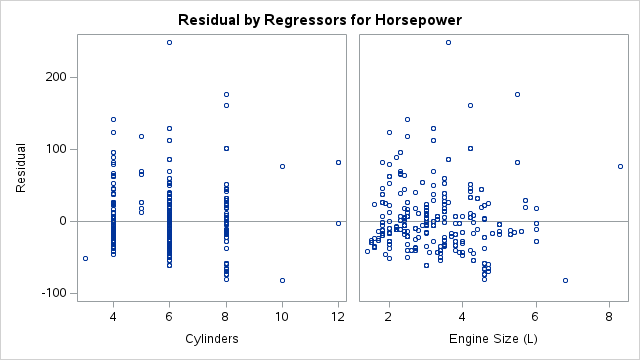


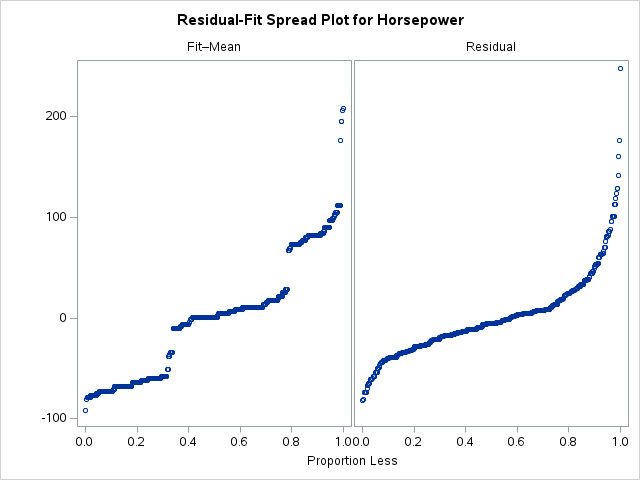


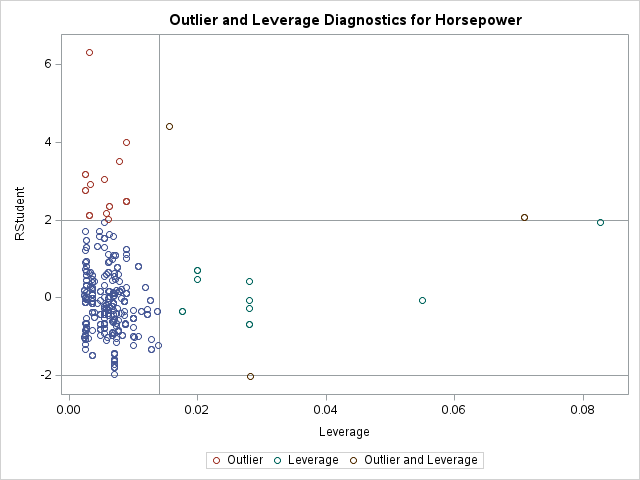


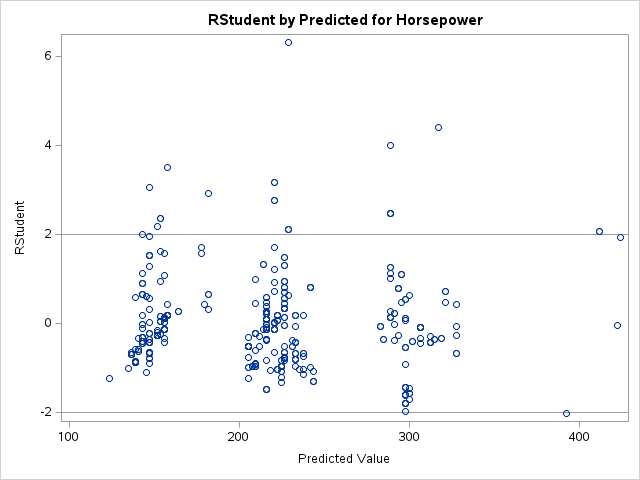

In [55]:
stat_results.ALL()

### Proc SQL anyone???  
#### And you can use the SASLIB method of the SASsession to assign any data you like (Teradata, Hadoop, ...)

In [56]:
#sas.saslib('Tera', engine='Teradata', options='user=&me pw=&mypw server=teracop1', prompt={'me': False, 'mypw': True})
sas.submitLOG('proc sql; create table sales as select month, sum(actual) as tot_sales, sum(predict) as predicted_sales from sashelp.prdsale group by 1 order by month ;quit;')
sales = sas.sasdata('sales')


1307  ods listing close;ods html5 (id=saspy_internal) file=stdout options(bitmap_mode='inline') device=svg style=HTMLBlue; ods
1307! graphics on / outputfmt=png;
NOTE: Writing HTML5(SASPY_INTERNAL) Body file: STDOUT
1308  
1309  proc sql;
1309!           create table sales as select month, sum(actual) as tot_sales, sum(predict) as predicted_sales from sashelp.prdsale
1309! group by 1 order by month ;quit;
NOTE: Table WORK.SALES created, with 24 rows and 3 columns.

NOTE: PROCEDURE SQL used (Total process time):
      real time           0.18 seconds
      cpu time            0.13 seconds
      
1310  
1311  ods html5 (id=saspy_internal) close;ods listing;



### Let's chart our sales for the aggregate table we created with the Proc SQL


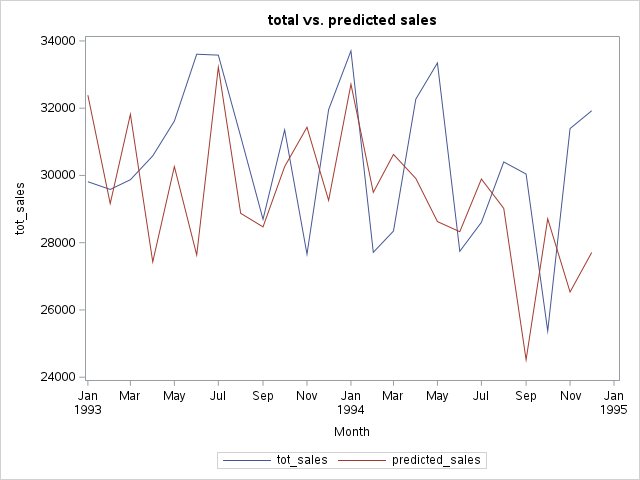

In [57]:
sales.series(y=['tot_sales','predicted_sales'], x='month', title='total vs. predicted sales')

## Try the ETS object

In [58]:
ets = sas.sasets()

In [59]:
ets_results = ets.timeid(id='horsepower', data=cars)

In [60]:
dir(ets_results)

['DECOMPOSITIONPLOT',
 'INTERVALCOUNTSCOMPONENTPLOT',
 'LOG',
 'OFFSETCOMPONENTPLOT',
 'SPANCOMPONENTPLOT',
 'VALUESPLOT']


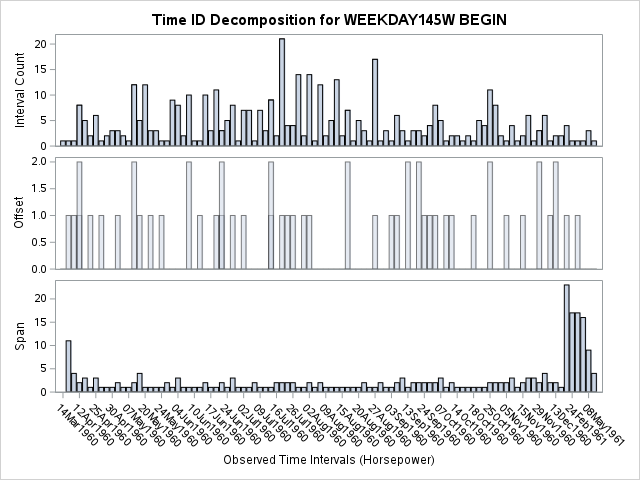

In [61]:
ets_results.DECOMPOSITIONPLOT

In [62]:
#ets_results.ALL()

## How would we get these results in a batch python script? Set batch to True and get the HTML returned to you to write out to a file and view later

In [63]:
sas.set_batch (True)

In [64]:
q = ets_results.DECOMPOSITIONPLOT

### q is the Dict with the LOG and LST. The LST is the HTML of the result. We'll display it here, but if you write it to a file it will render when you open it in a web browser too.


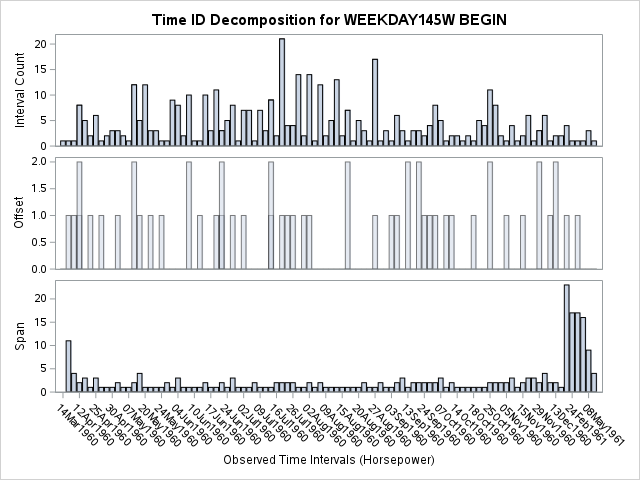

In [65]:
sas.HTML(q['LST'])

### the ALL() method returns a List of Dict's which is easy to traverse. Can write them out to their own files to view later. Just display them here for now.


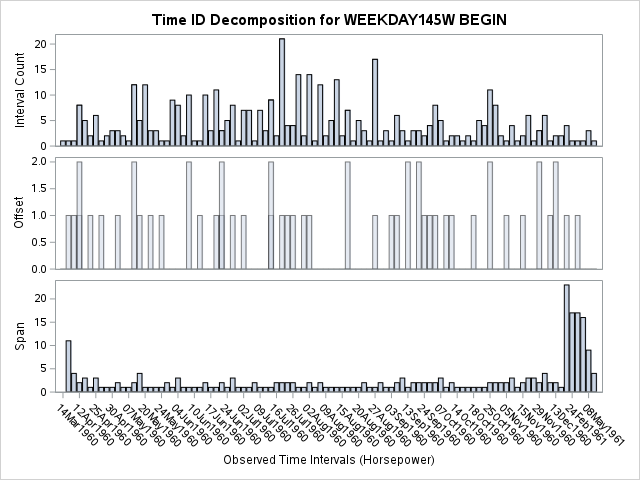


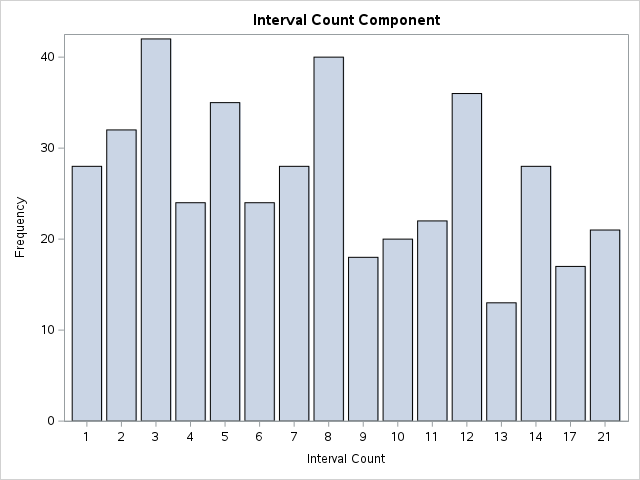


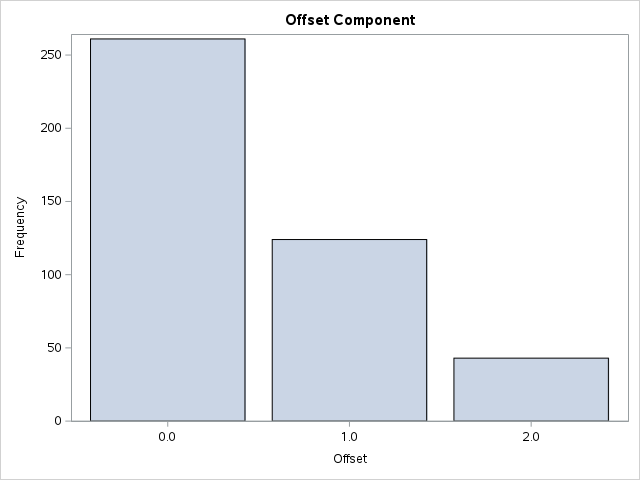


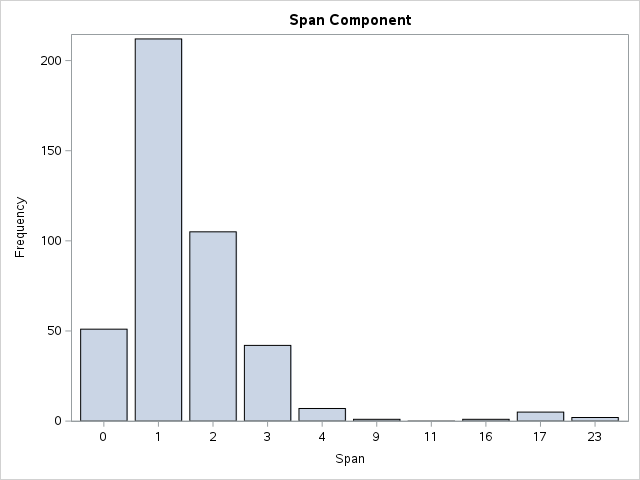


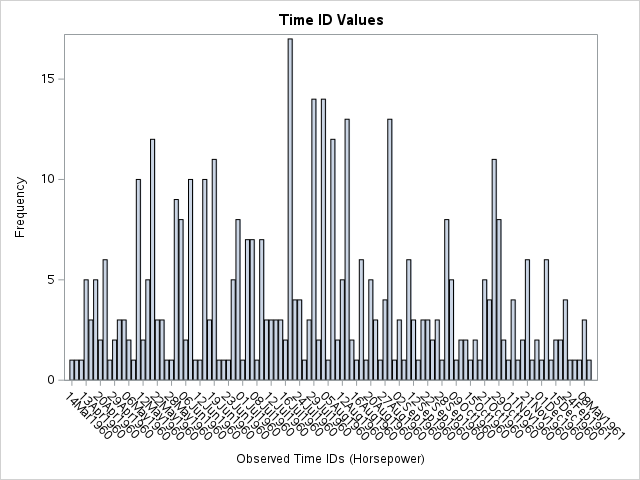

In [67]:
from IPython.display import display as DIS
x = ets_results.ALL()
for i in range(len(x)):
    if isinstance(x[i], dict):
        DIS(sas.HTML(x[i]['LST']))
    else:
        print(x[i])

## So lets write these out to the local file system as if this were a python batch script

In [68]:
for i in range(len(ets_results._names)):
    x = ets_results.__getattr__(ets_results._names[i])
    if type(x) is not str:
        out1 = open("/u/sastpw/saspy_demo/"+ets_results._names[i]+".html", mode='w+b')
        out1.write(x['LST'].encode())
        out1.close()
    else:
        out1 = open("/u/sastpw/saspy_demo/"+ets_results._names[i]+".log", mode='w+b')
        out1.write(x.encode())
        out1.close()

# You can interact with the filesystem on the SAS Server side
### in this case I'm running a local connection, so it's the same file system

In [69]:
# get a list of files and directories for this directory. Directories end with the file seperator
sas.dirlist('/u/sastpw/saspy_demo')

['pgm/',
 'ERROR_LOG.log',
 'LOG.log',
 'VALUESPLOT.html',
 'SPANCOMPONENTPLOT.html',
 'OFFSETCOMPONENTPLOT.html',
 'INTERVALCOUNTSCOMPONENTPLOT.html',
 'DECOMPOSITIONPLOT.html']

# Since this is Python, you can write a little code to make this more useful

In [70]:
import os
files = sas.dirlist(r"/u/sastpw/saspy_demo")
for file in files:
    f = "/u/sastpw/saspy_demo/"+file
    if f[len(f)-1] == sas.hostsep:
        print('Directory '+f+' contains:')
        print(sas.dirlist(f))
        print('\n')
    else:
        print('Next File is '+f)
        inf = sas.file_info(f)
        for key in inf.keys():
            print(key+": "+inf[key])
        print('\n')

Directory /u/sastpw/saspy_demo/pgm/ contains:
['saspyRnDdemo.py.bak', 'saspyRnDdemo.py']


Next File is /u/sastpw/saspy_demo/ERROR_LOG.log
Last Modified: 16Oct2019:16:39:51
Group Name: r&d
Filename: /u/sastpw/saspy_demo/ERROR_LOG.log
Owner Name: sastpw
File Size (bytes): 1946
Access Permission: -rw-r--r--


Next File is /u/sastpw/saspy_demo/LOG.log
Last Modified: 12Aug2020:11:17:44
Group Name: r&d
Filename: /u/sastpw/saspy_demo/LOG.log
Owner Name: sastpw
File Size (bytes): 9617
Access Permission: -rw-r--r--


Next File is /u/sastpw/saspy_demo/VALUESPLOT.html
Last Modified: 12Aug2020:11:17:44
Group Name: r&d
Filename: /u/sastpw/saspy_demo/VALUESPLOT.html
Owner Name: sastpw
File Size (bytes): 62041
Access Permission: -rw-r--r--


Next File is /u/sastpw/saspy_demo/SPANCOMPONENTPLOT.html
Last Modified: 12Aug2020:11:17:42
Group Name: r&d
Filename: /u/sastpw/saspy_demo/SPANCOMPONENTPLOT.html
Owner Name: sastpw
File Size (bytes): 43496
Access Permission: -rw-r--r--


Next File is /u/sastpw/sa

In [71]:
sas.set_batch (False)

## Now, let's learn a little SAS. With teach_me_SAS, any of the methods that run code will show you the code instead of running it. This way you can cut-n-paste it into a sas.submit() method and change it around and play with syntax and try your own version of code.

In [72]:
sas.teach_me_SAS(True)

In [73]:
sales.series(y=['tot_sales','predicted_sales'], x='month', title='total vs. predicted sales')

proc sgplot data=WORK.'sales'n ;
	title "total vs. predicted sales";
	series x='month'n y='tot_sales'n;
	series x='month'n y='predicted_sales'n;
run;
title;


In [74]:
ets_results = ets.timeid(id='horsepower', data=cars)

%macro proccall(d);
proc timeid data=sashelp.'cars'n  plot=all  ;
id horsepower;
run; quit; %mend;
%mangobj(tim0003,timeid,'cars'n);


In [75]:
stat_results = stat.reg(model='horsepower = Cylinders EngineSize', data=cars)

%macro proccall(d);
proc reg data=sashelp.'cars'n  plot=all  ;
model horsepower = Cylinders EngineSize;
run; quit; %mend;
%mangobj(reg0004,reg,'cars'n);


In [76]:
cars.describe()

proc means data=sashelp.'cars'n  stackodsoutput n nmiss median mean std min p25 p50 p75 max;run;


In [77]:
cars.tail(24)

proc print data=sashelp.'cars'n (obs=428 firstobs=405 );run;


In [78]:
sas.teach_me_SAS(False)

## The following isn't needed, SAS will shutdown when you stop the notebook. But you can shut it down manually if you want

In [79]:
#sas._endsas() 